In [175]:
!deactivate # if you're using any 
import os
import multiprocessing
os.environ['CUDA_VISIBLE_DEVICES'] = '0' # Change if GPU is more than 1

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

torch.backends.cudnn.benchmark = True

In [176]:
tfms = get_transforms(
    do_flip=False, 
    flip_vert=True, 
    max_rotate=15.0
)

num_workers = multiprocessing.cpu_count()

In [177]:
def data_build(size):
    data = ImageDataBunch.from_folder(
        'data-kaggle/car_data/car_data/train',
        train='train',
        valid_pct=.2,
        ds_tfms=tfms,
        size=(size, size),
        num_workers=num_workers,
        bs=32).normalize(imagenet_stats)
    
    return data

In [178]:
model = models.resnet50

In [179]:
data_400 = data_build(400)

In [180]:
learn = cnn_learner(
    data_400, 
    model, 
    ps=0.1,
    bn_final=True,
    pretrained=True,
    opt_func=optim.SGD,
    metrics=[accuracy, error_rate]).mixup()

In [181]:
model_path = Path('./models')

In [182]:
learn.path = model_path

In [183]:
learn.load('93.mdl')

Learner(data=ImageDataBunch;

Train: LabelList (27614 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: CategoryList
Audi TT RS Coupe 2012,Audi TT RS Coupe 2012,Audi TT RS Coupe 2012,Audi TT RS Coupe 2012,Audi TT RS Coupe 2012
Path: data-kaggle/car_data/car_data/train;

Valid: LabelList (6903 items)
x: ImageList
Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400),Image (3, 400, 400)
y: CategoryList
GMC Terrain SUV 2012,Buick Regal GS 2012,Ram C-V Cargo Van Minivan 2012,Aston Martin V8 Vantage Convertible 2012,Ford Mustang Convertible 2007
Path: data-kaggle/car_data/car_data/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation

In [109]:
test_tfms = get_transforms()

In [168]:
data_test = ImageDataBunch.from_folder(
    'data-kaggle/car_data/car_data/test', # Change this directory to your test data relative path
    valid_pct=0,
    ds_tfms=test_tfms,
    size=(500, 500),
    num_workers=num_workers,
    bs=32).normalize(imagenet_stats)

In [169]:
learn.data.valid_dl = data_test.train_dl

## Prediction

For changing image, please change the first element to desired image

In [170]:
img = learn.data.valid_ds[60][0]

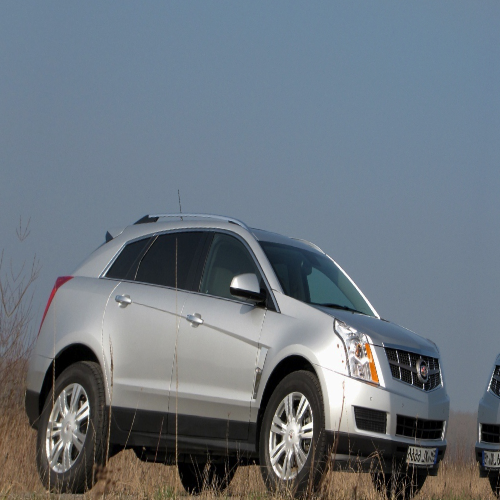

In [171]:
img

In [172]:
prediction = learn.predict(img, with_dropout=True)

In [193]:
pos = "Prediction confidence is: " + str(
    format(
        [prediction[2][prediction[1].item()]][0].item() * 100, '.2f'
    )) + " on category " + str(prediction[0])

In [194]:
pos

'Prediction confidence is: 100.00 on category Cadillac SRX SUV 2012'